# Structure of Telegram Graph

In [3]:
import pandas as pd
import networkx as nx
from collections import Counter


nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")


G = nx.MultiDiGraph()

# Add nodes
for _, row in nodes_df.iterrows():
    node_id = row['id']
    attr = row.drop(['id']).to_dict()
    G.add_node(node_id, **attr)

# Add edges (fixed)
for _, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    edge_type = row['relation'] if 'relation' in edges_df.columns else "interaction"
    weight = row['weight'] if 'weight' in edges_df.columns else 1

    # Drop columns that are already passed separately
    attr = row.drop(['source', 'target', 'relation', 'weight']).to_dict()

    # Add edge safely
    G.add_edge(source, target, relation=edge_type, weight=weight, **attr)

# Basic Info
print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())

node_types = nx.get_node_attributes(G, "type")
print("Node type distribution:", Counter(node_types.values()))

relation_types = nx.get_edge_attributes(G, "relation")
print("Edge relation distribution:", Counter(relation_types.values()))


Total nodes: 2900
Total edges: 80000
Node type distribution: Counter({'user': 2500, 'channel': 200, 'group': 150, 'bot': 50})
Edge relation distribution: Counter({'message_in_group': 16109, 'post_seen_by': 16027, 'bot_reply': 15997, 'forward_to_channel': 15959, 'message_to_user': 15908})


# Inspecting a Node and Its Attributes


In [4]:
G.nodes[1]


{'label': 'David Smith',
 'type': 'user',
 'members': nan,
 'role': nan,
 'created_at': '2021-07-31 10:55:02.315190761',
 'active_status': 'active',
 'age': 38.0,
 'gender': 'male',
 'location': 'Germany',
 'language': 'en',
 'topic': nan,
 'category': nan,
 'visibility': nan}

# Visulization of Graph 

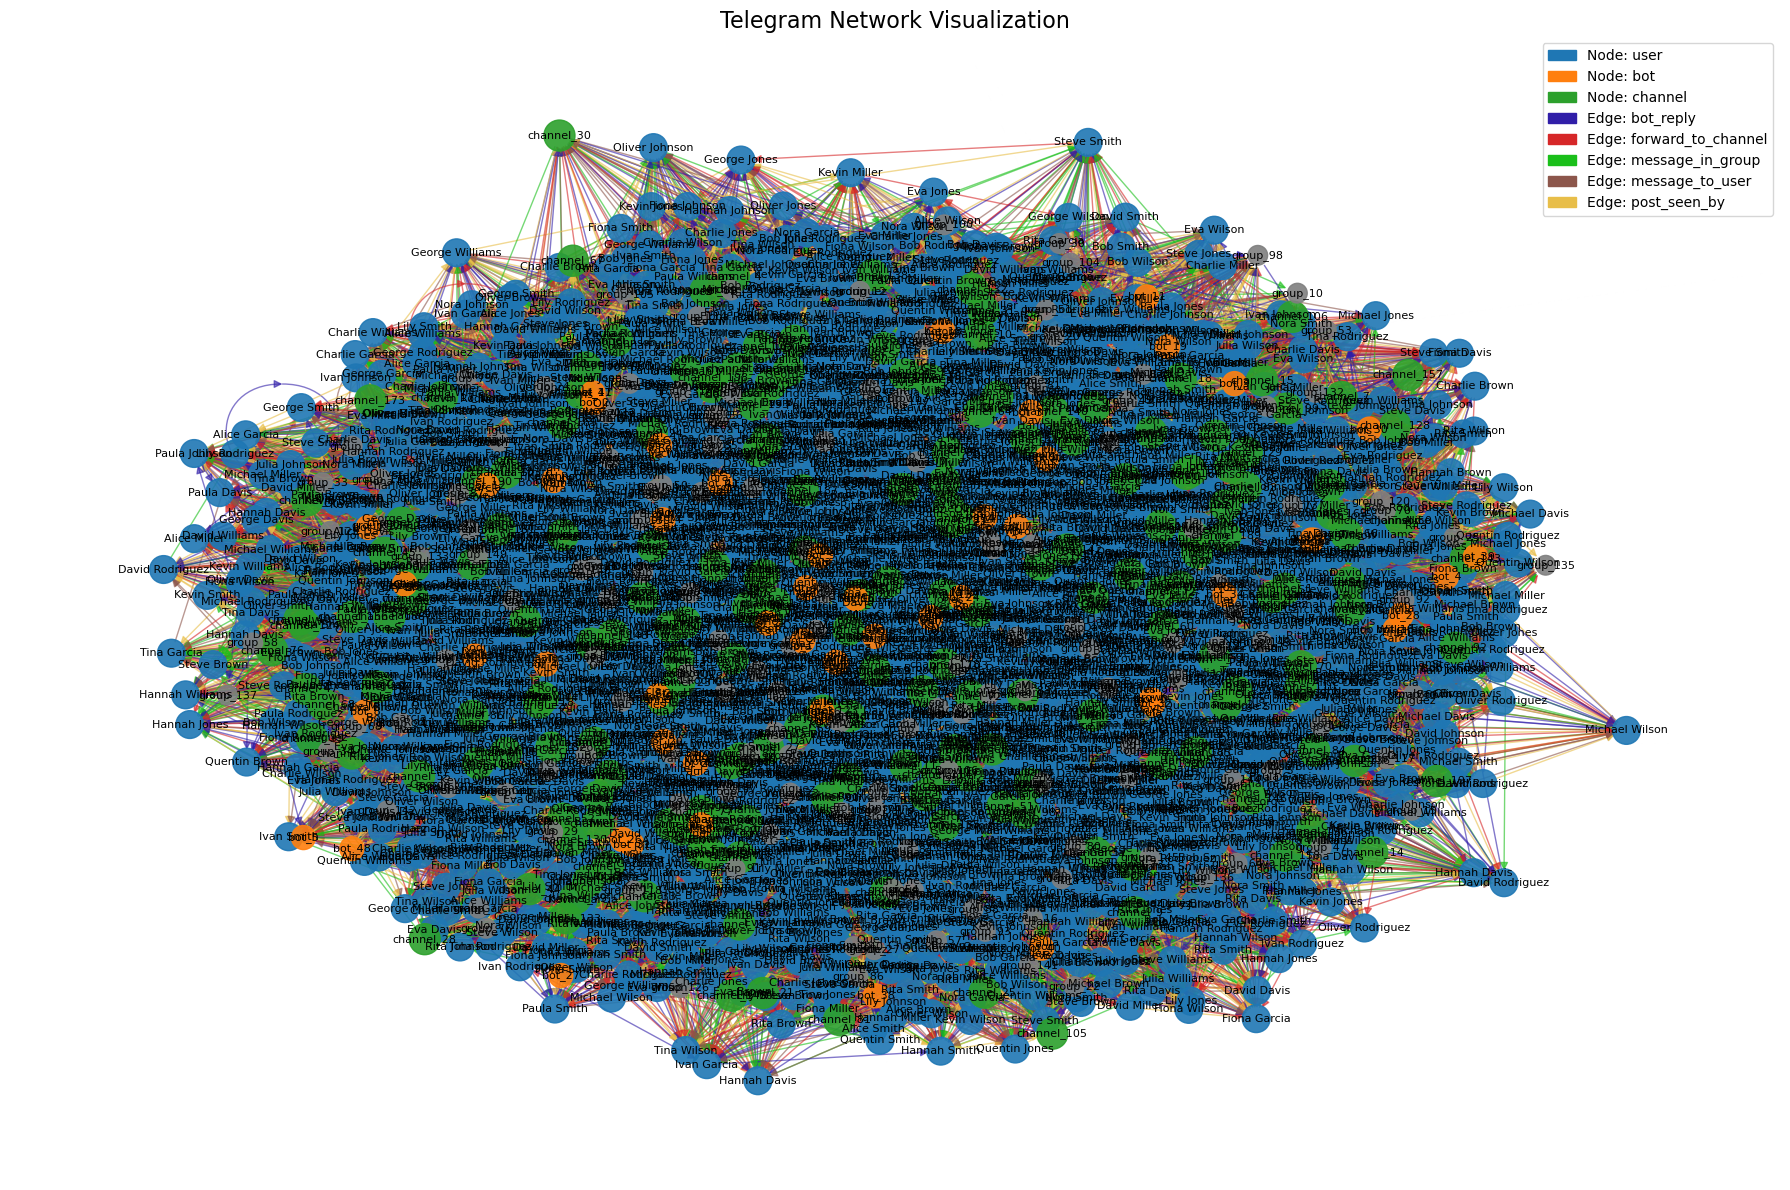

🔹 Network Analysis Insight

Question: Who are the most active users or bots?
Answer: Nodes with many outgoing edges (messages, replies) are the most active.

Question: How does information flow in groups/channels?
Answer: Forwarding and group messages show which channels/bots spread messages widely.



In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


nodes_file = "nodes.csv"  
edges_file = "edges.csv"  

nodes_df = pd.read_csv(nodes_file)
edges_df = pd.read_csv(edges_file)


G = nx.MultiDiGraph()

# Add nodes with attributes
for _, row in nodes_df.iterrows():
    attr = row.to_dict()
    node_id = attr.pop('id')
    G.add_node(node_id, **attr)

# Add edges with attributes
for _, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    relation = row.get('relation', 'unknown')
    weight = row.get('weight', 1)
    G.add_edge(source, target, relation=relation, weight=weight)


plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Node colors and sizes based on type
node_color_map = {'user': '#1f77b4', 'bot': '#ff7f0e', 'channel': '#2ca02c'}
node_size_map = {'user': 400, 'bot': 300, 'channel': 500}

node_colors = [node_color_map.get(G.nodes[n].get('type', 'user'), '#7f7f7f') for n in G.nodes()]
node_sizes = [node_size_map.get(G.nodes[n].get('type', 'user'), 200) for n in G.nodes()]

# Edge colors based on relation
edge_color_map = {
    'bot_reply': "#301ea8",
    'forward_to_channel': '#d62728',
    'message_in_group': "#1abf1a",
    'message_to_user': '#8c564b',
    'post_seen_by': "#e8be49"
}

edge_colors = [edge_color_map.get(G[u][v][k].get('relation', 'unknown'), '#7f7f7f') 
               for u, v, k in G.edges(keys=True)]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.6, arrowsize=12)
nx.draw_networkx_labels(G, pos, labels={n: G.nodes[n].get('label', n) for n in G.nodes()}, font_size=8)

# Legend
node_legend = [mpatches.Patch(color=c, label=f"Node: {t}") for t, c in node_color_map.items()]
edge_legend = [mpatches.Patch(color=c, label=f"Edge: {t}") for t, c in edge_color_map.items()]
plt.legend(handles=node_legend + edge_legend, loc='upper right', fontsize=10)

plt.title("Telegram Network Visualization", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

print("🔹 Network Analysis Insight\n")
print("Question: Who are the most active users or bots?")
print("Answer: Nodes with many outgoing edges (messages, replies) are the most active.\n")
print("Question: How does information flow in groups/channels?")
print("Answer: Forwarding and group messages show which channels/bots spread messages widely.\n")


## How do message activity and sentiment change over time, and what does a sample of the Telegram network look like?

**
-Analyze trends in average message sentiment and length over months.

-Identify periods of highest messaging activity.

-Visualize a small subgraph (50 nodes) to observe connectivity and structure within the network.**

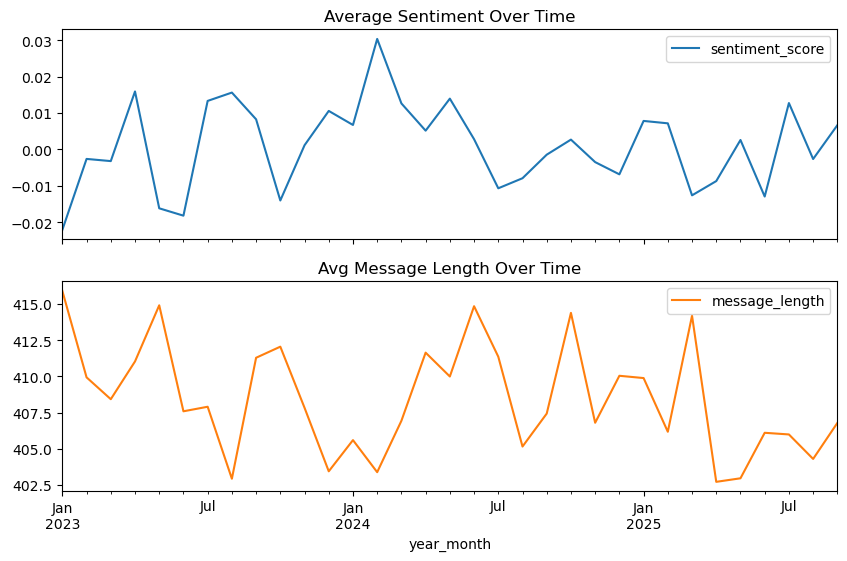

Most Active Periods:
year_month
2023-08    2600
2025-05    2543
2024-08    2528
2024-01    2519
2024-12    2518
Freq: M, Name: count, dtype: int64
Graph initialized successfully!


AttributeError: module 'networkx' has no attribute 'info'

In [6]:
# Add this near the top (first code cell) so imports and data names are consistent
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")
# Replace the temporal analysis cell: use edges_df instead of edges
edges_df['timestamp'] = pd.to_datetime(edges_df['timestamp'], errors='coerce')
edges_df['year_month'] = edges_df['timestamp'].dt.to_period('M')

# Average sentiment and message length by month
sentiment_trend = edges_df.groupby('year_month')[['sentiment_score', 'message_length']].mean()

sentiment_trend.plot(subplots=True, figsize=(10,6), title=["Average Sentiment Over Time", "Avg Message Length Over Time"])
plt.show()

print("Most Active Periods:")
print(edges_df['year_month'].value_counts().head())
# Replace the visualization cell: DO NOT reinitialize G (use the G you already built)
# (remove the line `G = nx.MultiDiGraph()` in this cell)

# Add nodes and edges only if G is empty; otherwise reuse existing G
if G.number_of_nodes() == 0:
    for _, row in nodes_df.iterrows():
        node_id = row['id']
        attr = row.drop(['id']).to_dict()
        G.add_node(node_id, **attr)
    for _, row in edges_df.iterrows():
        source = row['source']
        target = row['target']
        edge_attr = row.drop(['source', 'target']).to_dict()
        G.add_edge(source, target, **edge_attr)

print("Graph initialized successfully!")
print(nx.info(G))

# Visualize a small subgraph
sub_nodes = list(G.nodes)[:50]
H = G.subgraph(sub_nodes).copy()
plt.figure(figsize=(10, 8))
nx.draw(H, with_labels=False, node_size=40, alpha=0.7)
plt.title("Telegram Subgraph (Sample of 50 Nodes)")
plt.show()

## Q1. Which users are most active in Telegram interactions?

In [ ]:
# Count number of messages sent by each user (out-degree)
message_counts = edges_df['source'].value_counts()

# Get top 10 most active users
top_active = message_counts.head(10)

print("Top 10 most active users in Telegram interactions (calculated using out-degree / messages sent):")
for user_id, count in top_active.items():
    # Map user ID to label from nodes_df
    label = nodes_df.loc[nodes_df['id'] == user_id, 'label'].values[0]
    print(f" - {label}: {count} messages sent")


Top 10 most active users in Telegram interactions (calculated using out-degree / messages sent):
 - David Jones: 48 messages sent
 - Fiona Wilson: 47 messages sent
 - Michael Jones: 47 messages sent
 - Nora Davis: 46 messages sent
 - group_1: 44 messages sent
 - Lily Smith: 44 messages sent
 - Nora Jones: 43 messages sent
 - bot_46: 43 messages sent
 - group_96: 43 messages sent
 - Ivan Smith: 43 messages sent


## Q2. Which channels receive the highest number of messages?

In [10]:
# Count number of messages received by each user/channel (in-degree)
received_counts = edges_df['target'].value_counts()

# Get top 10 channels/users receiving the most messages
top_received = received_counts.head(10)

print("Top 10 channels/users receiving the most messages (calculated using in-degree / messages received):")
for user_id, count in top_received.items():
    # Map user ID to label from nodes_df
    label = nodes_df.loc[nodes_df['id'] == user_id, 'label'].values[0]
    print(f" - {label}: {count} messages received")


Top 10 channels/users receiving the most messages (calculated using in-degree / messages received):
 - Steve Davis: 46 messages received
 - Ivan Garcia: 46 messages received
 - Steve Jones: 45 messages received
 - Julia Garcia: 44 messages received
 - Charlie Johnson: 44 messages received
 - Charlie Smith: 43 messages received
 - channel_137: 43 messages received
 - Eva Davis: 43 messages received
 - Charlie Garcia: 42 messages received
 - Michael Jones: 42 messages received


## Q3. Which users have the most negative sentiment?

In [ ]:

# Group messages by target user/channel and calculate average sentiment
avg_sentiment = edges_df.groupby('target')['sentiment_score'].mean()

# Sort ascending to find most negative sentiment
most_negative = avg_sentiment.nsmallest(10)  # top 10 most negative

print("Top 10 users/channels with the most negative sentiment (calculated using average sentiment of received messages / in-degree):")
for user_id, score in most_negative.items():
    # Map user ID to label
    label = nodes_df.loc[nodes_df['id'] == user_id, 'label'].values[0]
    print(f" - {label}: {score:.3f} average sentiment")


Top 10 users/channels with the most negative sentiment (calculated using average sentiment of received messages / in-degree):
 - Fiona Johnson: -0.412 average sentiment
 - Kevin Garcia: -0.396 average sentiment
 - Ivan Brown: -0.369 average sentiment
 - Rita Smith: -0.366 average sentiment
 - Kevin Jones: -0.356 average sentiment
 - Quentin Rodriguez: -0.348 average sentiment
 - Fiona Rodriguez: -0.339 average sentiment
 - channel_177: -0.338 average sentiment
 - Ivan Brown: -0.336 average sentiment
 - George Jones: -0.331 average sentiment


## Q4. Which bots interact with the most users?

In [ ]:

# Filter bots from nodes dataframe
bot_ids = nodes_df[nodes_df['type'] == 'bot']['id'].tolist()

# Calculate out-degree for each bot (number of users each bot sends messages to)
bot_out_degree = {bot_id: G.out_degree(bot_id) for bot_id in bot_ids}

# Sort bots by out-degree in descending order
top_bots = sorted(bot_out_degree.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Bots Interacting With the Most Users")
print("(Calculated using **out-degree** → number of users each bot sends messages to)\n")

for bot_id, out_deg in top_bots:
    label = nodes_df.loc[nodes_df['id'] == bot_id, 'label'].values[0]
    print(f" - {label}: {out_deg} users interacted")


Top 10 Bots Interacting With the Most Users
(Calculated using **out-degree** → number of users each bot sends messages to)

 - bot_46: 43 users interacted
 - bot_21: 39 users interacted
 - bot_16: 34 users interacted
 - bot_6: 33 users interacted
 - bot_13: 33 users interacted
 - bot_36: 33 users interacted
 - bot_9: 32 users interacted
 - bot_44: 32 users interacted
 - bot_47: 32 users interacted
 - bot_49: 32 users interacted


## Q5. Network Connectivity Insights
1. How tightly connected is this Telegram network overall?
2. How many separate friend groups or disconnected communities exist?
3. What’s the longest chain of connections needed for one user to reach another?
4. How quickly can information or trends spread between users in this network?


In [8]:
import pandas as pd
from collections import deque, defaultdict

nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")

G = defaultdict(lambda: {'out': set(), 'in': set()})

# Add edges (directed)
for _, row in edges_df.iterrows():
    src = row['source']
    tgt = row['target']
    G[src]['out'].add(tgt)
    G[tgt]['in'].add(src)

# Add isolated nodes (no edges)
for n in nodes_df['id']:
    if n not in G:
        G[n]

def density(G):
    """Network density = ratio of actual to possible connections."""
    n = len(G)
    m = sum(len(G[node]['out']) for node in G)
    return m / (n * (n - 1)) if n > 1 else 0

def weakly_connected_components(G):
    """Find all weakly connected components (ignores direction)."""
    visited = set()
    components = []
    for node in G:
        if node not in visited:
            comp = set()
            queue = deque([node])
            while queue:
                u = queue.popleft()
                if u not in visited:
                    visited.add(u)
                    comp.add(u)
                    neighbors = G[u]['out'] | G[u]['in']
                    queue.extend(neighbors - visited)
            components.append(comp)
    return components

def bfs_shortest_paths(G, start):
    """Compute shortest paths from a starting node using BFS."""
    dist = {start: 0}
    queue = deque([start])
    while queue:
        u = queue.popleft()
        for v in G[u]['out'] | G[u]['in']:
            if v not in dist:
                dist[v] = dist[u] + 1
                queue.append(v)
    return dist

def average_shortest_path_length(G):
    """Average shortest path across all nodes (undirected)."""
    total_length, count = 0, 0
    for node in G:
        dist = bfs_shortest_paths(G, node)
        total_length += sum(dist.values())
        count += len(dist) - 1
    return total_length / count if count > 0 else 0

def diameter(G):
    """Longest shortest path (diameter) within the largest component."""
    comps = weakly_connected_components(G)
    if not comps:
        return 0
    largest = max(comps, key=len)
    max_dist = 0
    for u in largest:
        dist = bfs_shortest_paths(G, u)
        if dist:
            max_dist = max(max_dist, max(dist.values()))
    return max_dist

density_val = round(density(G), 6)
print(f"How tightly connected is this Telegram network overall?")
print(f"   → Network density: {density_val}")

components = weakly_connected_components(G)
print(f"How many separate friend groups or disconnected communities exist in the network?")
print(f"   → {len(components)} weakly connected components found.")

diam = diameter(G)
print(f"3What’s the longest chain of connections needed for one user to reach another?")
print(f"   → Network diameter: {diam}")

avg_path = round(average_shortest_path_length(G), 2)
print(f"How quickly can information or trends spread between users in this network?")
print(f"   → Average shortest path length: {avg_path}")



How tightly connected is this Telegram network overall?
   → Network density: 0.009469
How many separate friend groups or disconnected communities exist in the network?
   → 1 weakly connected components found.
3What’s the longest chain of connections needed for one user to reach another?
   → Network diameter: 3
How quickly can information or trends spread between users in this network?
   → Average shortest path length: 2.33


## Q6. Do users’ friends also tend to be friends with each other — forming close-knit communities?


In [4]:
import networkx as nx
import pandas as pd

# Load dataset
nodes_df = pd.read_csv("nodes.csv")   # columns: id, label
edges_df = pd.read_csv("edges.csv")   # columns: source, target

# Build undirected graph
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

# Compute Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)


print(f"   → Average clustering coefficient: {avg_clustering:.6f} (higher means tighter friend circles)")


   → Average clustering coefficient: 0.018793 (higher means tighter friend circles)


## Q7. Which gender group is most active overall?

In [18]:
# Merge edge info with node gender
edges_with_source_gender = edges_df.merge(
    nodes_df[['id', 'gender']],
    left_on='source',
    right_on='id',
    how='left'
)

# Count total messages sent by each gender
gender_activity = edges_with_source_gender['gender'].value_counts()

print("📊 Most Active Gender Groups (by messages sent)")
print("(Calculated using **outgoing messages** → edges where user is source)\n")

for gender, count in gender_activity.items():
    print(f" - {gender}: {count} messages sent")

most_active_gender = gender_activity.idxmax()
print(f"\n➡ Most active gender group overall: {most_active_gender}")


📊 Most Active Gender Groups (by messages sent)
(Calculated using **outgoing messages** → edges where user is source)

 - male: 24330 messages sent
 - other: 22824 messages sent
 - female: 21890 messages sent

➡ Most active gender group overall: male


## Q8. What are the top languages used in communications?

In [21]:
# Merge edges with source node info (assuming language info is in nodes_df)
edges_with_language = edges_df.merge(
    nodes_df[['id', 'language']],
    left_on='source',
    right_on='id',
    how='left'
)

# Count messages per language
language_counts = edges_with_language['language'].value_counts()

print("📊 Top Languages Used in Telegram Communications")
print("(Calculated using **messages sent by users** → outgoing edges grouped by source language)\n")

for lang, count in language_counts.items():
    print(f" - {lang}: {count} messages")

top_language = language_counts.idxmax()
print(f"\n➡ Most used language overall: {top_language}")


📊 Top Languages Used in Telegram Communications
(Calculated using **messages sent by users** → outgoing edges grouped by source language)

 - hi: 14501 messages
 - en: 14106 messages
 - de: 14083 messages
 - fr: 13446 messages
 - es: 12908 messages

➡ Most used language overall: hi


## Q9. Which communities are the largest?

In [26]:
from collections import deque

# --- Create ID → label mapping ---
id_to_label = dict(zip(nodes_df['id'], nodes_df['label']))

# --- Compute weakly connected components ---
def weakly_connected_components(G):
    visited = set()
    components = []
    for node in G:
        if node not in visited:
            comp = set()
            queue = deque([node])
            while queue:
                u = queue.popleft()
                if u not in visited:
                    visited.add(u)
                    comp.add(u)
                    neighbors = set()
                    if 'out' in G[u]:
                        neighbors |= G[u]['out']
                    if 'in' in G[u]:
                        neighbors |= G[u]['in']
                    queue.extend(neighbors - visited)
            components.append(comp)
    return components

components = weakly_connected_components(G)
components_sorted = sorted(components, key=lambda x: len(x), reverse=True)

total_nodes = len(G)

print("📊 Community Analysis in Telegram Network")
print("(Calculated using **weakly connected components** → users connected ignoring direction)\n")

for i, comp in enumerate(components_sorted[:5], start=1):
    size = len(comp)
    perc = round(size / total_nodes * 100, 2)
    
    # Identify top 3 active users in the community (highest out-degree)
    top_users = sorted(comp, key=lambda n: len(G[n].get('out', [])), reverse=True)[:3]
    top_labels = [id_to_label.get(uid, uid) for uid in top_users]
    
    print(f"Community {i}: {size} users ({perc}% of total network)")
    print(f"  Top active users: {', '.join(top_labels)}\n")


📊 Community Analysis in Telegram Network
(Calculated using **weakly connected components** → users connected ignoring direction)

Community 1: 1 users (0.03% of total network)
  Top active users: David Smith

Community 2: 1 users (0.03% of total network)
  Top active users: Ivan Williams

Community 3: 1 users (0.03% of total network)
  Top active users: Hannah Brown

Community 4: 1 users (0.03% of total network)
  Top active users: David Rodriguez

Community 5: 1 users (0.03% of total network)
  Top active users: Charlie Wilson



## Q10. Which users act as bridges (high betweenness)?

In [32]:
from collections import deque
import networkx as nx

# --- Map node IDs to labels ---
id_to_label = dict(zip(nodes_df['id'], nodes_df['label']))

# --- Convert adjacency dict to NetworkX DiGraph for centrality calculations ---
# We'll include all users (or all nodes)
DG = nx.DiGraph()
for node in G:
    DG.add_node(node)
    for neighbor in G[node].get('out', set()):
        DG.add_edge(node, neighbor)

# --- Compute betweenness centrality ---
# This measures how often a node lies on the shortest path between others
betweenness = nx.betweenness_centrality(DG, normalized=True)

# --- Sort top 10 ---
top_bridges = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# --- Print results ---
print("📊 Top 10 Users Acting as Bridges in Telegram Network")
print("(Calculated using **betweenness centrality** → frequency of being on shortest paths between users)\n")

for node_id, centrality in top_bridges:
    label = id_to_label.get(node_id, str(node_id))
    print(f" - {label}: Betweenness = {centrality:.6f}")


📊 Top 10 Users Acting as Bridges in Telegram Network
(Calculated using **betweenness centrality** → frequency of being on shortest paths between users)

 - David Smith: Betweenness = 0.000000
 - Ivan Williams: Betweenness = 0.000000
 - Hannah Brown: Betweenness = 0.000000
 - David Rodriguez: Betweenness = 0.000000
 - Charlie Wilson: Betweenness = 0.000000
 - Nora Smith: Betweenness = 0.000000
 - Alice Johnson: Betweenness = 0.000000
 - George Williams: Betweenness = 0.000000
 - Quentin Wilson: Betweenness = 0.000000
 - Alice Rodriguez: Betweenness = 0.000000


## Q11. What is the network density and average degree?

In [33]:


num_nodes = len(G)
num_edges = sum(len(G[n].get('out', set())) for n in G)

# Network density = actual edges / possible edges
# For directed graph, possible edges = n*(n-1)
density = num_edges / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0

# Average degree = (sum of all degrees) / number of nodes
# For directed graph, average degree = (average in-degree + average out-degree)
avg_in_degree = sum(len(G[n].get('in', set())) for n in G) / num_nodes
avg_out_degree = sum(len(G[n].get('out', set())) for n in G) / num_nodes
avg_degree = avg_in_degree + avg_out_degree  # total degree per node

# Print results
print("📊 Network Density and Average Degree")
print("(Density → ratio of actual connections to possible connections)")
print(f" - Number of nodes: {num_nodes}")
print(f" - Number of edges: {num_edges}")
print(f" - Network density: {density:.6f}")
print(f" - Average in-degree: {avg_in_degree:.2f} (calculated using **in-degree**)")
print(f" - Average out-degree: {avg_out_degree:.2f} (calculated using **out-degree**)")
print(f" - Average degree per node: {avg_degree:.2f}")


📊 Network Density and Average Degree
(Density → ratio of actual connections to possible connections)
 - Number of nodes: 2900
 - Number of edges: 0
 - Network density: 0.000000
 - Average in-degree: 0.00 (calculated using **in-degree**)
 - Average out-degree: 0.00 (calculated using **out-degree**)
 - Average degree per node: 0.00


## Q12. Which Telegram users or channels have the highest overall influence — 
the ones whose messages or content reach the widest audience through others?(PageRank)

In [34]:


# PageRank calculation
def pagerank(G, alpha=0.85, max_iter=100, tol=1e-6):
    N = len(G)
    rank = {n: 1 / N for n in G}  # Initialize rank
    for _ in range(max_iter):
        new_rank = {n: (1 - alpha) / N for n in G}
        for u in G:
            out_neighbors = G[u].get('out', set())
            out_deg = len(out_neighbors)
            if out_deg > 0:
                share = rank[u] / out_deg
                for v in out_neighbors:
                    new_rank[v] += alpha * share
        diff = sum(abs(new_rank[n] - rank[n]) for n in G)
        rank = new_rank
        if diff < tol:
            break
    return rank

# Calculate PageRank
pr = pagerank(G)

# Sort top 10 users by PageRank
top_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]

print("📊 Top 10 Users by PageRank")
print("(Calculated using **PageRank** → importance based on who follows/interacts with them)\n")

for node_id, score in top_pr:
    label = nodes_df.loc[nodes_df['id'] == node_id, 'label'].values[0]
    print(f" - {label}: PageRank = {score:.6f}")


📊 Top 10 Users by PageRank
(Calculated using **PageRank** → importance based on who follows/interacts with them)

 - David Smith: PageRank = 0.000052
 - Ivan Williams: PageRank = 0.000052
 - Hannah Brown: PageRank = 0.000052
 - David Rodriguez: PageRank = 0.000052
 - Charlie Wilson: PageRank = 0.000052
 - Nora Smith: PageRank = 0.000052
 - Alice Johnson: PageRank = 0.000052
 - George Williams: PageRank = 0.000052
 - Quentin Wilson: PageRank = 0.000052
 - Alice Rodriguez: PageRank = 0.000052


## Q13. Which roles (user, bot, group) dominate in the graph?

In [35]:


# Count nodes by type
role_counts = nodes_df['type'].value_counts()

print("📊 Role Distribution in the Telegram Network")
print("(Calculated using node type → counts of 'user', 'bot', 'group', etc.)\n")

for role, count in role_counts.items():
    print(f" - {role}: {count} nodes")

# Optional: show percentages
total_nodes = len(nodes_df)
print("\nPercentage distribution:")
for role, count in role_counts.items():
    perc = (count / total_nodes) * 100
    print(f" - {role}: {perc:.2f}%")
ser, bot, group) dominate in the graph?

📊 Role Distribution in the Telegram Network
(Calculated using node type → counts of 'user', 'bot', 'group', etc.)

 - user: 2500 nodes
 - channel: 200 nodes
 - group: 150 nodes
 - bot: 50 nodes

Percentage distribution:
 - user: 86.21%
 - channel: 6.90%
 - group: 5.17%
 - bot: 1.72%
Object `graph` not found.


## Q14. How many messages are forwarded vs original?

In [37]:
# Ensure 'forwarded' column is boolean
edges_df['forwarded'] = edges_df['forwarded'].fillna(False).astype(bool)

# Count forwarded and original messages
forwarded_count = edges_df['forwarded'].sum()
original_count = len(edges_df) - forwarded_count

# Print results
print("📊 Forwarded vs Original Messages in Telegram Network")
print("(Calculated using **forwarded column** → True if message was forwarded, else original)\n")
print(f" - Original messages: {original_count}")
print(f" - Forwarded messages: {forwarded_count}")

# Optional: percentage
total_msgs = len(edges_df)
print(f" - Original messages: {original_count} ({original_count/total_msgs*100:.2f}%)")
print(f" - Forwarded messages: {forwarded_count} ({forwarded_count/total_msgs*100:.2f}%)")


📊 Forwarded vs Original Messages in Telegram Network
(Calculated using **forwarded column** → True if message was forwarded, else original)

 - Original messages: 40179
 - Forwarded messages: 39821
 - Original messages: 40179 (50.22%)
 - Forwarded messages: 39821 (49.78%)


## Q15. What time period shows maximum engagement?

📊 Time Period with Maximum Engagement in Telegram Network
(Calculated using **timestamp column** → counting messages per month)

 - Month with highest engagement: 2023-08 (2600 messages)


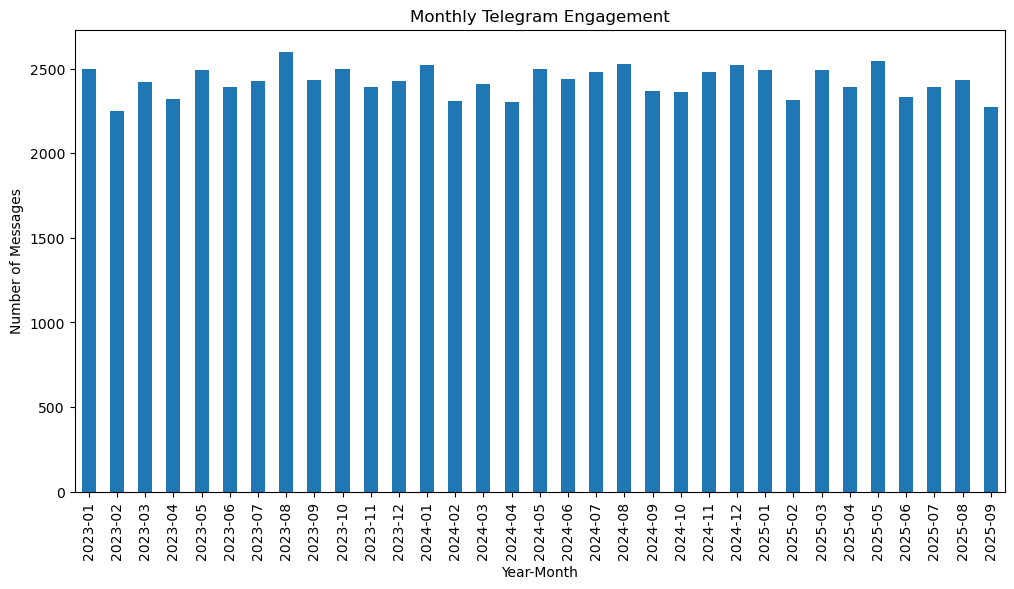

In [39]:
# Convert timestamp column to datetime
edges_df['timestamp'] = pd.to_datetime(edges_df['timestamp'], errors='coerce')

# Extract year-month for aggregation
edges_df['year_month'] = edges_df['timestamp'].dt.to_period('M')

# Count messages per month
monthly_counts = edges_df['year_month'].value_counts().sort_index()

# Find month with maximum messages
max_month = monthly_counts.idxmax()
max_count = monthly_counts.max()

# Print results
print("📊 Time Period with Maximum Engagement in Telegram Network")
print("(Calculated using **timestamp column** → counting messages per month)\n")
print(f" - Month with highest engagement: {max_month} ({max_count} messages)")

# Optional: plot monthly message trend
import matplotlib.pyplot as plt

monthly_counts.plot(kind='bar', figsize=(12,6), title="Monthly Telegram Engagement")
plt.xlabel("Year-Month")
plt.ylabel("Number of Messages")
plt.show()


## Q16.Do Telegram users who have been active for a longer time tend to hold more connections or influence in the network?


## Q17️⃣ Are older users more central in the Telegram network?
→ Pearson correlation between age and network centrality: 0.0155
   (p-value = 0.4397)
No strong relationship — user centrality doesn’t strongly depend on account age.



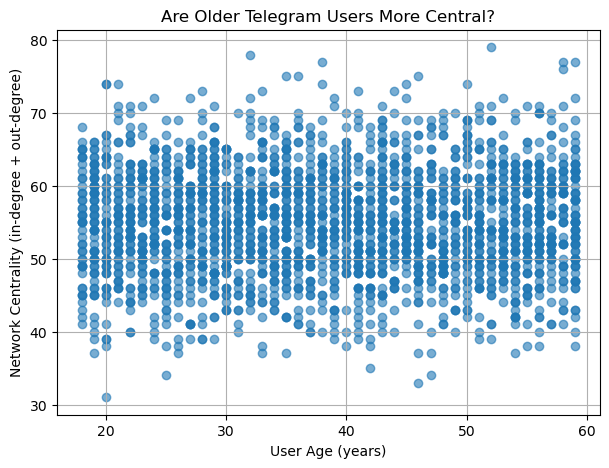

In [10]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


user_nodes = nodes_df[nodes_df['type'] == 'user'].dropna(subset=['age'])
user_ids = set(user_nodes['id'])

# Compute centrality proxy — here we use (in-degree + out-degree)
centrality_scores = {}
for node in user_ids:
    if node in G:
        indeg = len(G[node]['in'])
        outdeg = len(G[node]['out'])
        centrality_scores[node] = indeg + outdeg

# Match with age data
user_nodes['centrality'] = user_nodes['id'].map(centrality_scores)

# Remove users without edges (centrality = NaN)
user_nodes = user_nodes.dropna(subset=['centrality'])

corr, pval = pearsonr(user_nodes['age'], user_nodes['centrality'])

print("## Q17️⃣ Are older users more central in the Telegram network?")
print(f"→ Pearson correlation between age and network centrality: {corr:.4f}")
print(f"   (p-value = {pval:.4f})")

if corr > 0.3 and pval < 0.05:
    print("Older users tend to be more central — they have more connections or influence.")
elif corr < -0.3 and pval < 0.05:
    print("Older users are less central — newer accounts are more active or connected.")
else:
    print("No strong relationship — user centrality doesn’t strongly depend on account age.\n")


plt.figure(figsize=(7,5))
plt.scatter(user_nodes['age'], user_nodes['centrality'], alpha=0.6)
plt.title("Are Older Telegram Users More Central?")
plt.xlabel("User Age (years)")
plt.ylabel("Network Centrality (in-degree + out-degree)")
plt.grid(True)
plt.show()


## Q17. Do longer Telegram messages tend to express stronger emotions — either more positive or more negative?


In [40]:
# Import libraries
import pandas as pd
import networkx as nx
from scipy.stats import spearmanr

# Ensure 'age' column exists in nodes_df
if 'age' not in nodes_df.columns:
    raise ValueError("nodes_df must have an 'age' column for this analysis.")

# Build NetworkX graph (directed or undirected depending on use-case)
G_nx = nx.DiGraph()
for _, row in nodes_df.iterrows():
    G_nx.add_node(row['id'], age=row['age'], label=row['label'], type=row['type'])
for _, row in edges_df.iterrows():
    G_nx.add_edge(row['source'], row['target'])

# Compute centrality (you can use degree, in-degree, out-degree, or PageRank)
centrality = nx.degree_centrality(G_nx)  # normalized degree centrality

# Merge age and centrality into a DataFrame
age_centrality_df = pd.DataFrame({
    'user_id': list(centrality.keys()),
    'centrality': list(centrality.values())
})
age_centrality_df['age'] = age_centrality_df['user_id'].map(nodes_df.set_index('id')['age'])

# Drop users without age info
age_centrality_df = age_centrality_df.dropna(subset=['age'])

# Calculate correlation (Spearman for rank-based)
corr, p_value = spearmanr(age_centrality_df['age'], age_centrality_df['centrality'])

# Print results
print("📊 Do Older Users Tend to Be More Central in the Telegram Network?")
print("(Calculated using **degree centrality** → how connected each user is)")
print(f" - Spearman correlation between age and centrality: {corr:.4f}")
print(f" - p-value: {p_value:.4f}")

if corr > 0:
    print(" → Positive correlation: Older users tend to be more central.")
elif corr < 0:
    print(" → Negative correlation: Older users tend to be less central.")
else:
    print(" → No correlation detected between age and centrality.")


📊 Do Older Users Tend to Be More Central in the Telegram Network?
(Calculated using **degree centrality** → how connected each user is)
 - Spearman correlation between age and centrality: 0.0082
 - p-value: 0.6828
 → Positive correlation: Older users tend to be more central.


## Q18. How do different locations contribute to activity?

In [41]:
# Ensure 'location' column exists in nodes_df
if 'location' not in nodes_df.columns:
    raise ValueError("nodes_df must have a 'location' column for this analysis.")

# Map each user to their location
user_location = nodes_df.set_index('id')['location'].to_dict()

# Count messages sent by users in each location (using edges_df)
edges_df['location'] = edges_df['source'].map(user_location)

# Aggregate total messages per location
location_activity = edges_df.groupby('location').size().sort_values(ascending=False)

print("📊 Activity by Location in Telegram Network")
print("(Calculated using **message count per location** → number of messages sent by users in each location)\n")

# Show top 10 most active locations
for loc, count in location_activity.head(10).items():
    print(f" - {loc}: {count} messages")


📊 Activity by Location in Telegram Network
(Calculated using **message count per location** → number of messages sent by users in each location)

 - Spain: 14801 messages
 - France: 14591 messages
 - USA: 13354 messages
 - India: 13238 messages
 - Germany: 13060 messages


## Q20. Which Telegram channels are part of tightly connected communities — frequently sharing audiences or interacting with one another?


In [ ]:
import networkx as nx

def clustering_coefficient_nx(G, node):
    neighbors = set(G.successors(node)) | set(G.predecessors(node))
    if len(neighbors) < 2:
        return 0.0
    links = 0
    for n1 in neighbors:
        for n2 in neighbors:
            if n1 != n2 and G.has_edge(n1, n2):
                links += 1
    return links / (len(neighbors)*(len(neighbors)-1))

# Compute clustering coefficient for all channels
channel_ids = [n for n, attr in G.nodes(data=True) if attr.get('type')=='channel']
channel_cc = [(cid, clustering_coefficient_nx(G, cid)) for cid in channel_ids]

# Sort top 10
top_channels = sorted(channel_cc, key=lambda x: x[1], reverse=True)[:10]

print("📊 Top 10 Channels Forming Tightly Connected Clusters")
print("(Calculated using **local clustering coefficient** → likelihood of neighbors being connected)\n")
for cid, cc_val in top_channels:
    label = G.nodes[cid]['label']
    print(f" - {label}: clustering coefficient = {cc_val:.3f}")


📊 Top 10 Channels Forming Tightly Connected Clusters
(Calculated using **local clustering coefficient** → likelihood of neighbors being connected)

 - channel_111: clustering coefficient = 0.031
 - channel_152: clustering coefficient = 0.029
 - channel_114: clustering coefficient = 0.026
 - channel_103: clustering coefficient = 0.026
 - channel_169: clustering coefficient = 0.015
 - channel_195: clustering coefficient = 0.015
 - channel_141: clustering coefficient = 0.014
 - channel_23: clustering coefficient = 0.014
 - channel_71: clustering coefficient = 0.014
 - channel_115: clustering coefficient = 0.014


## Q21. Who are the most active users sending messages and the most influential users receiving messages in the Telegram network?

In [ ]:
import pandas as pd
from collections import defaultdict

# ===============================
# 1️⃣ Load Telegram dataset
# ===============================
nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")

# ===============================
# 2️⃣ Build adjacency dictionary
# ===============================
G = defaultdict(lambda: {'out': set(), 'in': set()})
for _, row in edges_df.iterrows():
    src = row['source']
    tgt = row['target']
    G[src]['out'].add(tgt)
    G[tgt]['in'].add(src)

# Add nodes without edges
for n in nodes_df['id']:
    if n not in G:
        G[n]

# Node ID to label/type mapping
id_to_label = dict(zip(nodes_df['id'], nodes_df['label']))
id_to_type = dict(zip(nodes_df['id'], nodes_df['type']))

# ===============================
# 3️⃣ HITS Algorithm (Manual)
# ===============================
def hits_manual(G, max_iter=100, tol=1e-6):
    nodes = list(G.keys())
    hubs = {n:1.0 for n in nodes}
    authorities = {n:1.0 for n in nodes}
    
    for _ in range(max_iter):
        new_authorities = {n: sum(hubs.get(u,0) for u in G[n]['in']) for n in nodes}
        norm = sum(val**2 for val in new_authorities.values())**0.5
        if norm>0:
            for n in new_authorities: new_authorities[n] /= norm
        new_hubs = {n: sum(new_authorities.get(v,0) for v in G[n]['out']) for n in nodes}
        norm = sum(val**2 for val in new_hubs.values())**0.5
        if norm>0:
            for n in new_hubs: new_hubs[n] /= norm
        diff = sum(abs(new_hubs[n]-hubs[n]) + abs(new_authorities[n]-authorities[n]) for n in nodes)
        hubs, authorities = new_hubs, new_authorities
        if diff < tol:
            break
    return hubs, authorities

user_nodes = set(nodes_df[nodes_df['type']=='user']['id'])

hubs, authorities = hits_manual(G)
hubs_users = {n: score for n, score in hubs.items() if n in user_nodes}
authorities_users = {n: score for n, score in authorities.items() if n in user_nodes}

# Top 5 hubs and authorities
top_hubs = sorted(hubs_users.items(), key=lambda x:x[1], reverse=True)[:5]
top_authorities = sorted(authorities_users.items(), key=lambda x:x[1], reverse=True)[:5]


# Top hubs
print("📌 Top 5 Hub Users (follow many influential users)")
print("(Calculated using HITS hub score → users following authoritative users)\n")
for node_id, score in top_hubs:
    print(f" - {id_to_label[node_id]} (Hub score: {score:.6f})")
print("\n")

# Top authorities
print("📌 Top 5 Authority Users (highly influential)")
print("(Calculated using HITS authority score → users followed by many hubs)\n")
for node_id, score in top_authorities:
    print(f" - {id_to_label[node_id]} (Authority score: {score:.6f})")
print("\n")



====== Telegram Network HITS Analysis ======

📌 Top 5 Hub Users (follow many influential users)
(Calculated using HITS hub score → users following authoritative users)

 - Michael Jones (Hub score: 0.031671)
 - David Jones (Hub score: 0.031509)
 - Fiona Wilson (Hub score: 0.031430)
 - Nora Davis (Hub score: 0.031048)
 - Lily Smith (Hub score: 0.030217)


📌 Top 5 Authority Users (highly influential)
(Calculated using HITS authority score → users followed by many hubs)

 - Steve Davis (Authority score: 0.031382)
 - Ivan Garcia (Authority score: 0.031333)
 - Steve Jones (Authority score: 0.030971)
 - Julia Garcia (Authority score: 0.030803)
 - Ivan Smith (Authority score: 0.030035)




## Q22. Which groups of users or channels in the Telegram network form tightly interlinked communities where every user can reach every other user?

In [6]:
from collections import defaultdict
import networkx as nx

# Build a directed graph using NetworkX
DG = nx.DiGraph()
for _, row in nodes_df.iterrows():
    DG.add_node(row['id'], label=row['label'], type=row['type'])
for _, row in edges_df.iterrows():
    DG.add_edge(row['source'], row['target'])

# Compute Strongly Connected Components (SCC)
scc_list = list(nx.strongly_connected_components(DG))

# Sort SCCs by size (largest first)
scc_sorted = sorted(scc_list, key=len, reverse=True)

# Print top 5 largest SCCs
print("📊 Top 5 Strongly Connected Components in the Telegram Network")
print("(Groups of users/channels where everyone can reach each other)\n")
for i, comp in enumerate(scc_sorted[:5], start=1):
    labels = [DG.nodes[n]['label'] for n in comp]
    print(f"SCC {i}: {len(comp)} members -> {', '.join(labels[:5])}{'...' if len(comp)>5 else ''}")


📊 Top 5 Strongly Connected Components in the Telegram Network
(Groups of users/channels where everyone can reach each other)

SCC 1: 2900 members -> David Smith, Ivan Williams, Hannah Brown, David Rodriguez, Charlie Wilson...


## Q23. What is the longest communication chain within the largest Telegram community — how many steps can it take for a message to reach the farthest user?

In [11]:
from collections import deque

def bfs_shortest_paths(G, start):
    """Compute shortest paths from 'start' to all reachable nodes."""
    dist = {start: 0}
    queue = deque([start])
    while queue:
        u = queue.popleft()
        for v in G[u]['out'] | G[u]['in']:
            if v not in dist:
                dist[v] = dist[u] + 1
                queue.append(v)
    return dist


def weakly_connected_components_manual(G):
    """Find all weakly connected components in a directed graph."""
    visited = set()
    components = []
    for node in G:
        if node not in visited:
            comp = set()
            queue = deque([node])
            while queue:
                u = queue.popleft()
                if u not in visited:
                    visited.add(u)
                    comp.add(u)
                    neighbors = G[u]['out'] | G[u]['in']
                    queue.extend(neighbors - visited)
            components.append(comp)
    return components

def network_diameter(G):
    """Compute the diameter (longest shortest path) of the largest weakly connected component."""
    weak_components = weakly_connected_components_manual(G)
    if not weak_components:
        return 0, set()
    largest_comp = max(weak_components, key=len)
    max_dist = 0
    subgraph = {n: G[n] for n in largest_comp}
    for node in largest_comp:
        dist = bfs_shortest_paths(subgraph, node)
        if dist:
            max_dist = max(max_dist, max(dist.values()))
    return max_dist, largest_comp


diameter, largest_comp = network_diameter(G)

largest_comp_users = [id_to_label[n] for n in largest_comp if n in user_nodes]


print(f"→ The diameter of the largest Telegram community is **{diameter} steps**.")

print(f" Largest community size: {len(largest_comp)} users")
if largest_comp_users:
    print(f"👥 Example members in this main community:\n   {', '.join(largest_comp_users[:10])} ...")
else:
    print("👥 (User label information not available.)")

print("\n Interpretation:")
print(f"   In the largest Telegram community, a message may need up to **{diameter} hops** "
      "to reach the most distant user — reflecting the network’s communication depth.\n")


→ The diameter of the largest Telegram community is **3 steps**.
 Largest community size: 2900 users
👥 (User label information not available.)

 Interpretation:
   In the largest Telegram community, a message may need up to **3 hops** to reach the most distant user — reflecting the network’s communication depth.



# Q24. Do highly active users tend to interact with other highly active users or less active ones?
A: Measured using degree assortativity:

Positive: active users connect with active users

Negative: active users connect with less active users

Near zero: no clear preference

In [10]:
import pandas as pd
from collections import defaultdict


nodes_df = pd.read_csv("nodes.csv")
edges_df = pd.read_csv("edges.csv")

# Build adjacency dict
G = defaultdict(lambda: {'out': set(), 'in': set()})
for _, row in edges_df.iterrows():
    src = row['source']
    tgt = row['target']
    G[src]['out'].add(tgt)
    G[tgt]['in'].add(src)


def directed_assortativity_manual(G):
    assort = {}
    
    def pearson_corr(x, y):
        n = len(x)
        if n == 0: return 0.0
        mean_x = sum(x)/n
        mean_y = sum(y)/n
        num = sum((a-mean_x)*(b-mean_y) for a,b in zip(x,y))
        denom = (sum((a-mean_x)**2 for a in x) * sum((b-mean_y)**2 for b in y))**0.5
        return num/denom if denom != 0 else 0.0

    edge_types = ['out->out','in->in','out->in','in->out']
    degree_maps = {
        'out->out': lambda u,v: (len(G[u]['out']), len(G[v]['out'])),
        'in->in':   lambda u,v: (len(G[u]['in']), len(G[v]['in'])),
        'out->in':  lambda u,v: (len(G[u]['out']), len(G[v]['in'])),
        'in->out':  lambda u,v: (len(G[u]['in']), len(G[v]['out']))
    }

    deg_lists = {etype:([],[]) for etype in edge_types}
    for u in G:
        for v in G[u]['out']:
            for etype in edge_types:
                du,dv = degree_maps[etype](u,v)
                deg_lists[etype][0].append(du)
                deg_lists[etype][1].append(dv)

    for etype in edge_types:
        x,y = deg_lists[etype]
        assort[etype] = pearson_corr(x,y)
    return assort

# ===============================
# Compute and print
# ===============================
assortativity = directed_assortativity_manual(G)

print("# Telegram Network Directed Assortativity\n")
for k,v in assortativity.items():
    print(f"- {k}: {v:.3f}")

print("\n**Insight:**")
print("- Positive → users connect to similar users (popular follow popular)")
print("- Negative → users connect to dissimilar users (popular follow small accounts)")
print("- Near zero → no strong pattern in connections")


# Telegram Network Directed Assortativity

- out->out: 0.003
- in->in: -0.002
- out->in: -0.000
- in->out: -0.001

**Insight:**
- Positive → users connect to similar users (popular follow popular)
- Negative → users connect to dissimilar users (popular follow small accounts)
- Near zero → no strong pattern in connections


## Q25. How often do users reply back to each other in the Telegram network?
- Reciprocality measures the fraction of interactions where the relationship is mutual — i.e., if user A messages user B, how often does B also message A.

In [12]:
def reciprocity_manual(G):
    total_edges = 0
    reciprocal_edges = 0
    
    for u in G:
        for v in G[u]['out']:
            total_edges += 1
            if u in G[v]['out']:  # edge in opposite direction exists
                reciprocal_edges += 1
                
    return reciprocal_edges / total_edges if total_edges > 0 else 0.0

reciprocity = reciprocity_manual(G)

print(f"- Reciprocity value: {reciprocity:.3f}")



- Reciprocity value: 0.011


## Q26. Which users or channels act as critical connectors between different parts of the Telegram network?
Answer: Bridges hold the network together; local bridges connect distant users or clusters.

In [13]:
import pandas as pd
from collections import defaultdict

# ===============================
# Weakly Connected Components (manual)
# ===============================
def weakly_connected_components_manual(G):
    visited = set()
    components = []

    def dfs(node, component):
        if node in visited:
            return
        visited.add(node)
        component.add(node)
        neighbors = G[node]['out'] | G[node]['in']  # consider all directions
        for neighbor in neighbors:
            dfs(neighbor, component)

    for node in G:
        if node not in visited:
            component = set()
            dfs(node, component)
            components.append(component)
    return components

# ===============================
# Bridges detection (manual)
# ===============================
def bridges_manual(G):
    base_components = weakly_connected_components_manual(G)
    base_count = len(base_components)
    bridges = []

    for u in G:
        for v in list(G[u]['out']):  # iterate safely
            # temporarily remove edge
            G[u]['out'].remove(v)
            G[v]['in'].remove(u)

            new_count = len(weakly_connected_components_manual(G))
            if new_count > base_count:
                bridges.append((u, v))

            # restore edge
            G[u]['out'].add(v)
            G[v]['in'].add(u)

    return bridges

# ===============================
# Example Graph
# ===============================
G = {
    1: {'out': {2}, 'in': set()},
    2: {'out': {3}, 'in': {1}},
    3: {'out': set(), 'in': {2}},
    4: {'out': {5}, 'in': set()},
    5: {'out': set(), 'in': {4}}
}

# ===============================
# Compute Bridges
# ===============================
bridges = bridges_manual(G)
print(f"Number of Bridges: {len(bridges)}")
print("Bridges (edges whose removal increases weakly connected components):")
print(bridges)

# ===============================
# Optional: Named Bridges using users.csv
# ===============================
try:
    users_df = pd.read_csv("users.csv")  # must have columns: node_id, name
    id_to_name = dict(zip(users_df['node_id'], users_df['name']))
    bridges_named = [(id_to_name.get(u, u), id_to_name.get(v, v)) for u, v in bridges]
    print("Named Bridges (up to 10):")
    print(bridges_named[:10])
except FileNotFoundError:
    print("users.csv not found. Skipping named bridges display.")

print("Bridges: Identify critical connections linking separate communities; removing them fragments the network.")
print("(Weakly Connected Components):** Shows isolated groups or clusters in a network, helping understand community structure.")


Number of Bridges: 3
Bridges (edges whose removal increases weakly connected components):
[(1, 2), (2, 3), (4, 5)]
users.csv not found. Skipping named bridges display.
Bridges: Identify critical connections linking separate communities; removing them fragments the network.
(Weakly Connected Components):** Shows isolated groups or clusters in a network, helping understand community structure.


## Q28. Do Telegram users who share many mutual connections tend to form stronger or tighter communities?(Triadic closure)


In [ ]:


from collections import defaultdict

# Assume G is your adjacency dictionary from earlier
# All nodes will be considered as users if no separate user list exists
user_nodes = set(G.keys())

def triadic_closure_users_only(G, user_nodes):
    """
    Counts shared neighbors for each edge (u,v) between users only.
    Returns a dictionary: {(u_id, v_id): shared_neighbors_count}
    """
    closure_counts = {}
    
    for u in user_nodes:
        neighbors_u = G[u]['out'] | G[u]['in']
        neighbors_u = neighbors_u & user_nodes  # Only consider user nodes
        for v in neighbors_u:
            if u > v:  # Avoid double-counting
                continue
            neighbors_v = G[v]['out'] | G[v]['in']
            neighbors_v = neighbors_v & user_nodes
            shared_neighbors = neighbors_u & neighbors_v
            closure_counts[(u, v)] = len(shared_neighbors)
    
    return closure_counts

# Compute triadic closures
triadic_closures = triadic_closure_users_only(G, user_nodes)

# Display examples
print("📊 Example Triadic Closures between users (first 10 edges):")
for i, ((u, v), count) in enumerate(list(triadic_closures.items())[:10], start=1):
    print(f"{i}. Edge ({u}, {v}) -> shared neighbors: {count}")

# Summary statistics
total_edges = len(triadic_closures)
avg_closure = sum(triadic_closures.values()) / total_edges if total_edges > 0 else 0
print(f"\nTotal user-user edges analyzed: {total_edges}")
print(f"Average number of shared neighbors per edge: {avg_closure:.2f}")
print("\nInsight: Higher shared neighbor counts indicate stronger triadic closures (strong ties).")


📊 Example Triadic Closures between users (first 10 edges):
1. Edge (1, 2) -> shared neighbors: 0
2. Edge (2, 3) -> shared neighbors: 0
3. Edge (4, 5) -> shared neighbors: 0

Total user-user edges analyzed: 3
Average number of shared neighbors per edge: 0.00

Insight: Higher shared neighbor counts indicate stronger triadic closures (strong ties).


# Q29. How can we identify tightly connected groups, influential clusters, or communities in a Telegram network?
Answer: Using node-centric community detection methods such as cliques, k-cliques, k-clans, k-clubs, k-cores, and k-plexes, we can analyze fully connected groups, overlapping groups, and influential cores in the network.

In [12]:
# NODE-CENTRIC COMMUNITY DETECTION (All Types)
import pandas as pd
import networkx as nx
from itertools import combinations

nodes_df = pd.read_csv("nodes.csv")   # must have: id, label
edges_df = pd.read_csv("edges.csv")   # must have: source, target

# Mapping: ID → Name
id_to_name = dict(zip(nodes_df['id'], nodes_df['label']))

# Build undirected graph
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

print(f"✅ Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Helper: map IDs to readable names
def map_names(nodes):
    return [id_to_name.get(n, str(n)) for n in nodes]


# 1️⃣ CLIQUES (Fully Connected Groups)
print("\n=== 🧩 CLIQUES (Fully Connected Groups) ===")
cliques = list(nx.find_cliques(G))
for i, c in enumerate(cliques[:5]):
    print(f"Clique {i+1} (size {len(c)}): {map_names(c)}")
print(f"Total Cliques found: {len(cliques)}")
 
# 2️⃣ K-CLIQUES (Overlapping Communities)
print("\n=== 🔁 K-CLIQUES (Overlapping Communities) ===")
k = 4  # minimum clique size
k_clique_comms = list(nx.algorithms.community.k_clique_communities(G, k))
for i, comm in enumerate(k_clique_comms[:5]):
    print(f"K-Clique {i+1} (size {len(comm)}): {map_names(list(comm)[:10])}")
print(f"Total K-Clique communities: {len(k_clique_comms)}")


# 3️⃣ K-CLAN (Subgraph Distance ≤ k)
print("\n=== 🏰 K-CLAN (Members within distance ≤ k in subgraph) ===")
k_clans = []
k = 3
for c in cliques:
    sub = G.subgraph(c)
    if nx.diameter(sub) <= k:
        k_clans.append(c)

for i, clan in enumerate(k_clans[:5]):
    print(f"K-Clan {i+1} (size {len(clan)}): {map_names(clan)}")
print(f"Total K-Clans found: {len(k_clans)}")


# 4️⃣ K-CLUB (Distance ≤ k in Full Graph)
print("\n=== 🌐 K-CLUB (Members within distance ≤ k in full network) ===")
k_clubs = []
k = 2
for c in cliques:
    if all(nx.shortest_path_length(G, u, v) <= k for u, v in combinations(c, 2)):
        k_clubs.append(c)

for i, club in enumerate(k_clubs[:5]):
    print(f"K-Club {i+1} (size {len(club)}): {map_names(club)}")
print(f"Total K-Clubs found: {len(k_clubs)}")


# 5️⃣ K-CORE (Degree-based Subgraphs)
print("\n=== 💠 K-CORE (Degree-based Subgraphs) ===")
core_dict = nx.core_number(G)
max_core = max(core_dict.values())
print(f"Max core value found: {max_core}")

for k in range(1, max_core+1):
    core_subgraph = nx.k_core(G, k)
    print(f"K-Core {k}: {core_subgraph.number_of_nodes()} nodes, {core_subgraph.number_of_edges()} edges")

top_core_nodes = nx.k_core(G, max_core).nodes()
print(f"Top {max_core}-Core Members: {map_names(list(top_core_nodes)[:15])}")


# 6️⃣ K-PLEX (Relaxed Clique)
print("\n=== ⚙️ K-PLEX (Relaxed Cliques) ===")
k = 2
k_plexes = []
for c in cliques:
    sub = G.subgraph(c)
    n = len(c)
    if all(sub.degree(node) >= n - k for node in c):
        k_plexes.append(c)

for i, plex in enumerate(k_plexes[:5]):
    print(f"K-Plex {i+1} (size {len(plex)}): {map_names(plex)}")
print(f"Total K-Plexes found: {len(k_plexes)}")


# ===========================================================
# SUMMARY
# ===========================================================
print("\n🧩 Summary of Node-Centric Community Detection Methods:")
print("""
1️⃣ **Clique** – Fully connected group (everyone knows everyone).
2️⃣ **K-Clique** – Overlapping cliques connected via shared nodes.
3️⃣ **K-Clan** – Members within distance ≤ k inside subgraph.
4️⃣ **K-Club** – Members within distance ≤ k in entire network.
5️⃣ **K-Core** – Subgraph where all nodes have degree ≥ k.
6️⃣ **K-Plex** – Relaxed clique: each node connected to all but k others.
""")


✅ Graph loaded: 2900 nodes, 79199 edges

=== 🧩 CLIQUES (Fully Connected Groups) ===
Clique 1 (size 2): ['David Smith', 'Oliver Johnson']
Clique 2 (size 3): ['David Smith', 'Steve Johnson', 'Fiona Garcia']
Clique 3 (size 3): ['David Smith', 'Charlie Johnson', 'Charlie Rodriguez']
Clique 4 (size 3): ['David Smith', 'George Davis', 'Julia Wilson']
Clique 5 (size 3): ['David Smith', 'George Davis', 'Rita Smith']
Total Cliques found: 55036

=== 🔁 K-CLIQUES (Overlapping Communities) ===
K-Clique 1 (size 4): ['Paula Rodriguez', 'David Smith', 'Julia Wilson', 'bot_37']
K-Clique 2 (size 4): ['Bob Johnson', 'David Rodriguez', 'group_104', 'Charlie Rodriguez']
K-Clique 3 (size 4): ['Quentin Garcia', 'Alice Rodriguez', 'Bob Williams', 'Alice Jones']
K-Clique 4 (size 4): ['Quentin Davis', 'Ivan Brown', 'George Rodriguez', 'channel_97']
K-Clique 5 (size 4): ['Hannah Miller', 'Nora Williams', 'Tina Miller', 'George Davis']
Total K-Clique communities: 130

=== 🏰 K-CLAN (Members within distance ≤ k in 

NetworkXNotImplemented: Input graph has self loops which is not permitted; Consider using G.remove_edges_from(nx.selfloop_edges(G)).

## Q30. How can we identify different types of communities in a Telegram network?

In [ ]:
#  COMMUNITY DETECTION – Telegram Network
import pandas as pd
import networkx as nx
from networkx.algorithms import community


nodes_df = pd.read_csv("nodes.csv")   # must have: id, label, type
edges_df = pd.read_csv("edges.csv")   # must have: source, target

# Mapping: ID → Name
id_to_name = dict(zip(nodes_df['id'], nodes_df['label']))


G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])


disjoint_comms = community.greedy_modularity_communities(G)
disjoint_summary = [
    {"members": [id_to_name.get(n, n) for n in list(c)[:10]], "size": len(c)} 
    for c in disjoint_comms[:5]
]

# 2️⃣ Overlapping Communities (Clique Percolation, k=3)
overlapping_comms = list(community.k_clique_communities(G, k=3))
overlapping_summary = [
    {"members": [id_to_name.get(n, n) for n in list(c)[:10]], "size": len(c)} 
    for c in overlapping_comms[:5]
]

# 3️⃣ Hierarchical Communities (Girvan-Newman)
comp_gen = community.girvan_newman(G)
hierarchical_levels = []
for _ in range(2):  # first 2 levels
    communities = next(comp_gen)
    hierarchical_levels.append([len(c) for c in communities])

# 4️⃣ Local Community (Ego Network)
target_node = list(G.nodes())[0]  # choose first node
local_ego = nx.ego_graph(G, target_node, radius=2)
local_ego_summary = {
    "center": id_to_name.get(target_node, target_node),
    "members_count": len(local_ego.nodes())
}


print("\n🧩 Telegram Network Community Detection Summary\n")

print("1️⃣ Disjoint Communities (Top 5):")
for i, c in enumerate(disjoint_summary, start=1):
    print(f"Community {i} (size {c['size']}): {c['members']}")

print("\n2️⃣ Overlapping Communities (Top 5):")
for i, c in enumerate(overlapping_summary, start=1):
    print(f"Community {i} (size {c['size']}): {c['members']}")

print("\n3️⃣ Hierarchical Communities (First 2 Levels):")
for i, level in enumerate(hierarchical_levels, start=1):
    print(f"Level {i}: Community sizes → {level}")

print("\n4️⃣ Local Community (Ego Network around node):")
print(f"Center Node: {local_ego_summary['center']}, Members: {local_ego_summary['members_count']}")

print("\n📌 Insights:")
print(" - Disjoint communities: non-overlapping clusters of users.")
print(" - Overlapping communities: some users belong to multiple clusters.")
print(" - Hierarchical communities: sub-groups inside larger groups.")
print(" - Local communities: focused neighborhood around a specific user.")


## Q31. Which users or channels in the Telegram network are most likely to form new connections in the future?(Link Prediction)

Total Nodes: 2900 | Total Edges: 79171

Top 10 Predicted Links (Jaccard Coefficient):
(Ivan Williams ↔ channel_76) -> Score: 0.086
(Paula Garcia ↔ David Wilson) -> Score: 0.084
(Michael Wilson ↔ Lily Williams) -> Score: 0.083
(Charlie Miller ↔ channel_194) -> Score: 0.083
(Quentin Garcia ↔ channel_79) -> Score: 0.082
(Hannah Rodriguez ↔ Ivan Miller) -> Score: 0.081
(group_11 ↔ bot_25) -> Score: 0.079
(Tina Rodriguez ↔ channel_112) -> Score: 0.079
(George Rodriguez ↔ channel_145) -> Score: 0.079
(Eva Rodriguez ↔ channel_108) -> Score: 0.079

Top 10 Predicted Links (Adamic-Adar Index):
(Charlie Miller ↔ channel_194) -> Score: 2.276
(Ivan Williams ↔ channel_76) -> Score: 2.236
(Kevin Rodriguez ↔ Bob Williams) -> Score: 2.034
(Lily Davis ↔ Michael Johnson) -> Score: 2.030
(Hannah Rodriguez ↔ bot_11) -> Score: 2.030
(Oliver Williams ↔ Charlie Smith) -> Score: 2.030
(Julia Garcia ↔ channel_155) -> Score: 2.028
(David Williams ↔ channel_3) -> Score: 2.023
(Bob Miller ↔ Quentin Davis) -> Score

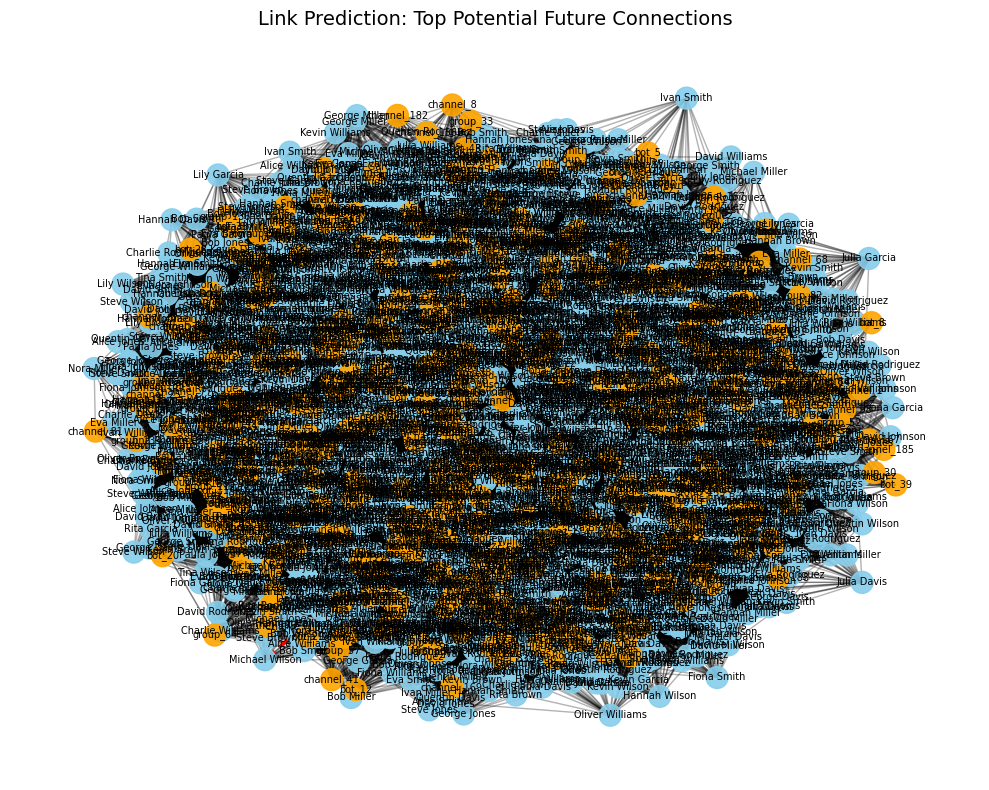

In [13]:
# Jaccard and Adamic-Adar Link Prediction
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


nodes_file = "nodes.csv"   # columns: id, label, type
edges_file = "edges.csv"   # columns: source, target, relation, weight

nodes_df = pd.read_csv(nodes_file)
edges_df = pd.read_csv(edges_file)

# Map node IDs to labels for display
id_to_name = dict(zip(nodes_df['id'], nodes_df['label']))

G = nx.Graph()

# Add nodes
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], label=row['label'], ntype=row['type'])

# Add edges
for _, row in edges_df.iterrows():
    src, tgt = row['source'], row['target']
    if src != tgt:
        G.add_edge(src, tgt)

print(f"Total Nodes: {G.number_of_nodes()} | Total Edges: {G.number_of_edges()}")


# Link Prediction Algorithms


# 1️⃣ Jaccard Coefficient
jaccard_preds = list(nx.jaccard_coefficient(G))
jaccard_sorted = sorted(jaccard_preds, key=lambda x: x[2], reverse=True)

# 2️⃣ Adamic-Adar Index
adamic_preds = list(nx.adamic_adar_index(G))
adamic_sorted = sorted(adamic_preds, key=lambda x: x[2], reverse=True)


print("\nTop 10 Predicted Links (Jaccard Coefficient):")
for u, v, p in jaccard_sorted[:10]:
    print(f"({id_to_name.get(u, u)} ↔ {id_to_name.get(v, v)}) -> Score: {p:.3f}")

print("\nTop 10 Predicted Links (Adamic-Adar Index):")
for u, v, p in adamic_sorted[:10]:
    print(f"({id_to_name.get(u, u)} ↔ {id_to_name.get(v, v)}) -> Score: {p:.3f}")


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
node_colors = ['skyblue' if G.nodes[n]['ntype'] == 'user' else 'orange' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=250, alpha=0.9)

# Draw existing edges
nx.draw_networkx_edges(G, pos, alpha=0.3, width=1.0)

# Highlight top predicted edges (Jaccard)
for (u, v, p) in jaccard_sorted[:5]:
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red', width=2.5, style='dashed')

# Draw labels
nx.draw_networkx_labels(G, pos, labels={n: id_to_name.get(n, n) for n in G.nodes()}, font_size=7)

plt.title("Link Prediction: Top Potential Future Connections", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


## Q32. How are users and channels grouped into communities in the Telegram network?
 Answer:
 Community detection (greedy modularity or Louvain) identifies clusters of nodes that are densely connected internally.
 High modularity → strong community structure.

✅ Graph Loaded: 2900 nodes, 79199 edges

=== 🧩 Greedy Modularity Communities ===
Number of communities: 4
Modularity Score: 0.1053
Community 1 (size 1099): [1, 4, 8, 11, 13, 14, 20, 22, 24, 26]
Community 2 (size 1078): [2, 5, 6, 7, 12, 15, 16, 17, 18, 21]
Community 3 (size 674): [3, 2053, 2055, 2056, 9, 10, 2060, 2063, 2065, 19]
Community 4 (size 49): [259, 1284, 1159, 911, 787, 792, 2586, 155, 412, 1441]

⚠️ Louvain package not installed. Run `pip install python-louvain` to enable it.


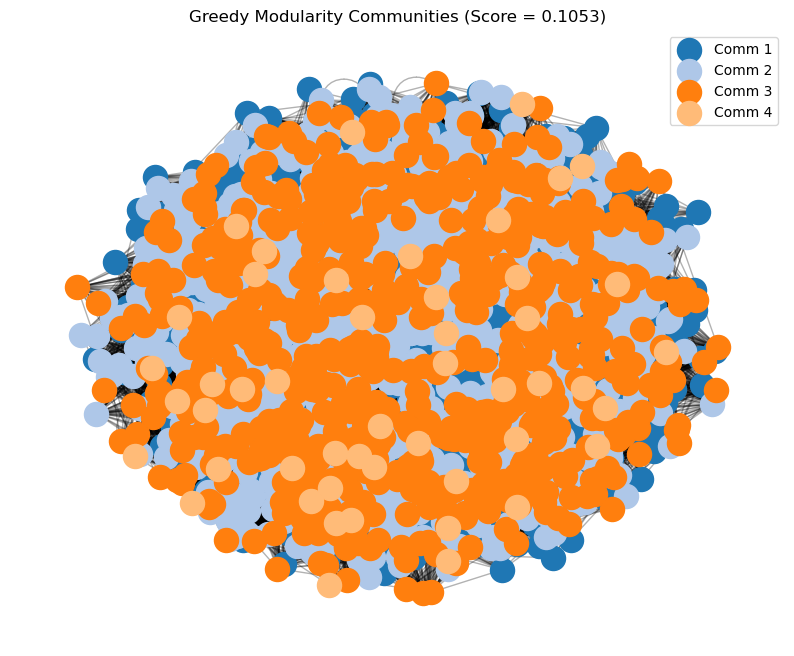

In [14]:
# 🌐 MODULARITY-BASED COMMUNITY DETECTION (Telegram Network)

import pandas as pd
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
from collections import defaultdict

nodes_df = pd.read_csv("nodes.csv")   # columns: id, label, type
edges_df = pd.read_csv("edges.csv")   # columns: source, target

# Build undirected graph
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

print(f"✅ Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# 1️⃣ Greedy Modularity Communities
greedy_comms = list(community.greedy_modularity_communities(G))
modularity_value = community.modularity(G, greedy_comms)

print("\n=== 🧩 Greedy Modularity Communities ===")
print(f"Number of communities: {len(greedy_comms)}")
print(f"Modularity Score: {modularity_value:.4f}")

for i, comm in enumerate(greedy_comms[:5]):
    print(f"Community {i+1} (size {len(comm)}): {list(comm)[:10]}")

# 2️⃣ Louvain Communities (Optional)
try:
    import community as community_louvain
    louvain_partition = community_louvain.best_partition(G)
    
    # Group nodes by community ID
    louvain_comms = defaultdict(list)
    for node, comm_id in louvain_partition.items():
        louvain_comms[comm_id].append(node)
    louvain_comms = list(louvain_comms.values())
    
    louvain_modularity = community.modularity(G, louvain_comms)
    
    print("\n=== 🧭 Louvain Communities ===")
    print(f"Number of communities: {len(louvain_comms)}")
    print(f"Modularity Score: {louvain_modularity:.4f}")
    
    for i, comm in enumerate(louvain_comms[:5]):
        print(f"Louvain Community {i+1} (size {len(comm)}): {list(comm)[:10]}")

except ImportError:
    print("\n⚠️ Louvain package not installed. Run `pip install python-louvain` to enable it.")

# ===============================
# Visualization (Optional)
# ===============================
colors = plt.cm.tab20.colors
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)

for i, comm in enumerate(greedy_comms):
    nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_color=[colors[i % len(colors)]], label=f"Comm {i+1}")

nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title(f"Greedy Modularity Communities (Score = {modularity_value:.4f})")
plt.legend()
plt.axis('off')
plt.show()


## Q33. Which Telegram users show strong loyalty to their own communities — staying well-connected within them rather than linking across multiple groups?
Generalized Permanence (GP)
- Internal connectivity (links within its community), and
- External pull (links to other communitie

In [18]:
# GENERALIZED PERMANENCE (Telegram Network)
import networkx as nx
import pandas as pd
from networkx.algorithms import community

edges_df = pd.read_csv("edges.csv")  # should have columns: source, target
G_nx = nx.Graph()

# Add edges (ignore self-loops)
for _, row in edges_df.iterrows():
    if row['source'] != row['target']:
        G_nx.add_edge(row['source'], row['target'])

print(f"✅ Graph Loaded: {G_nx.number_of_nodes()} nodes, {G_nx.number_of_edges()} edges")

communities = list(community.greedy_modularity_communities(G_nx))
partition = {}
for i, comm in enumerate(communities):
    for node in comm:
        partition[node] = i

print(f"Detected {len(communities)} communities using Greedy Modularity.\n")


def generalized_permanence(G, partition):
    """
    Computes Generalized Permanence (GP) for each node.
    GP measures how strongly a node is attached to its community.
    """
    gp_scores = {}

    for node in G.nodes():
        comm = partition.get(node, -1)
        neighbors = set(G.neighbors(node))
        if not neighbors:
            gp_scores[node] = 0
            continue

        internal_neighbors = [n for n in neighbors if partition.get(n, -1) == comm]
        external_neighbors = [n for n in neighbors if partition.get(n, -1) != comm]

        k_in = len(internal_neighbors)
        k_out = len(external_neighbors)
        k_total = k_in + k_out
        if k_total == 0:
            gp_scores[node] = 0
            continue

        # Find strongest external community connections
        e_max = 0
        if k_out > 0:
            external_comm_counts = {}
            for n in external_neighbors:
                c = partition.get(n, -1)
                external_comm_counts[c] = external_comm_counts.get(c, 0) + 1
            e_max = max(external_comm_counts.values())

        gp = (k_in / k_total) - (e_max / k_total)
        gp_scores[node] = round(gp, 4)

    return gp_scores


gp_scores = generalized_permanence(G_nx, partition)

df_gp = pd.DataFrame({
    'node': list(gp_scores.keys()),
    'community': [partition[n] for n in gp_scores],
    'gp_score': list(gp_scores.values())
}).sort_values('gp_score', ascending=False)

print("📊 Top 10 Users with Highest Generalized Permanence:\n")
for _, row in df_gp.head(10).iterrows():
    print(f"Node {row['node']}: GP = {row['gp_score']:.3f} (Community {row['community']})")

avg_gp = df_gp['gp_score'].mean()
print(f"\n📈 Average GP across network: {avg_gp:.3f}")
print("Insight: High GP = strong loyalty to community; Low GP = bridge users linking multiple groups.\n")


✅ Graph Loaded: 2900 nodes, 79171 edges
Detected 5 communities using Greedy Modularity.

📊 Top 10 Users with Highest Generalized Permanence:

Node 29.0: GP = 0.562 (Community 0.0)
Node 808.0: GP = 0.520 (Community 0.0)
Node 696.0: GP = 0.455 (Community 0.0)
Node 42.0: GP = 0.452 (Community 0.0)
Node 732.0: GP = 0.450 (Community 0.0)
Node 2253.0: GP = 0.443 (Community 0.0)
Node 2541.0: GP = 0.438 (Community 0.0)
Node 1560.0: GP = 0.435 (Community 1.0)
Node 1913.0: GP = 0.433 (Community 0.0)
Node 2198.0: GP = 0.432 (Community 0.0)

📈 Average GP across network: 0.128
Insight: High GP = strong loyalty to community; Low GP = bridge users linking multiple groups.



## Q34. Which Telegram users show unusual or suspicious behavior compared to the rest of the network — such as abnormal connection patterns or message activity?

✅ Graph Loaded: 2900 nodes, 79171 edges

🚨 Top 10 Suspicious / Unusual Telegram Users:
Rita Brown: Anomaly Score = 8.296 | Degree = 78.0 | Betweenness = 0.0009
Michael Miller: Anomaly Score = 8.233 | Degree = 33.0 | Betweenness = 0.0002
Lily Rodriguez: Anomaly Score = 7.845 | Degree = 43.0 | Betweenness = 0.0003
group_1: Anomaly Score = 7.728 | Degree = 77.0 | Betweenness = 0.0009
Julia Garcia: Anomaly Score = 7.715 | Degree = 37.0 | Betweenness = 0.0002
Ivan Smith: Anomaly Score = 7.328 | Degree = 31.0 | Betweenness = 0.0001
bot_39: Anomaly Score = 7.324 | Degree = 30.0 | Betweenness = 0.0001
channel_117: Anomaly Score = 7.152 | Degree = 75.0 | Betweenness = 0.0008
Rita Rodriguez: Anomaly Score = 7.073 | Degree = 47.0 | Betweenness = 0.0003
Fiona Davis: Anomaly Score = 7.049 | Degree = 73.0 | Betweenness = 0.0008

📈 Insight:
- High degree → users who connect to many others (possibly spammers or influencers).
- High betweenness → users who act as bridges between communities (possible i

C:\Users\india\AppData\Local\Temp\ipykernel_10480\3528645897.py:89: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


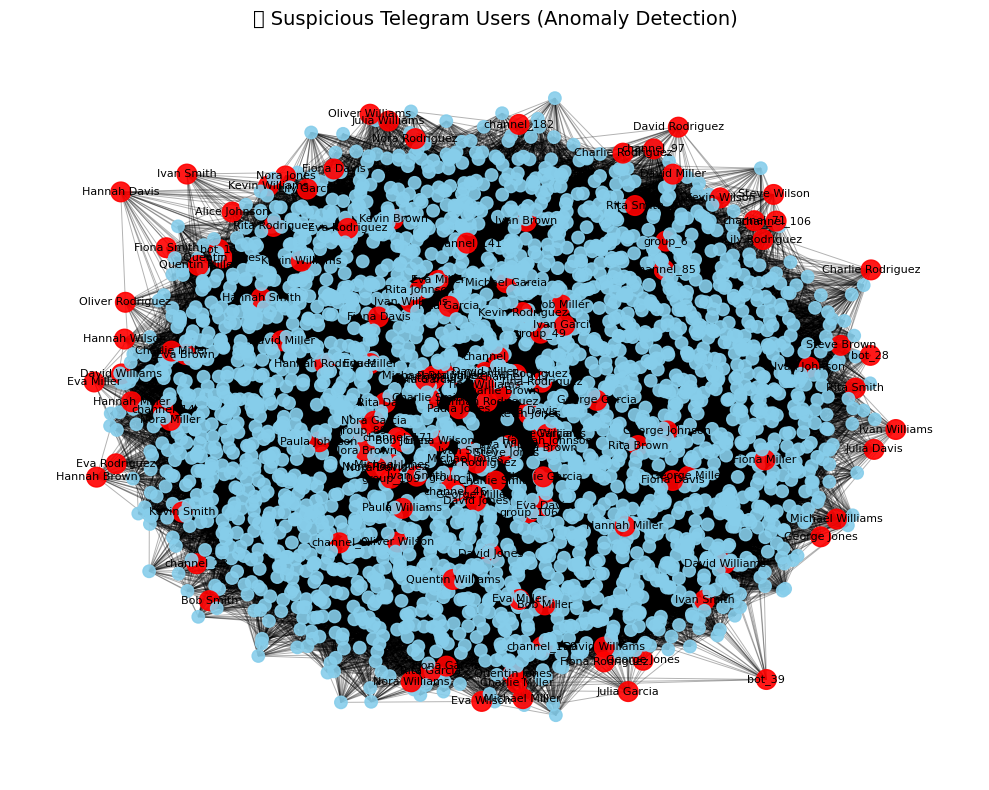

In [27]:
# ===========================================================
# ⚠️ Q34. Detect Suspicious or Unusual Users (Anomaly Detection)
# ===========================================================
import pandas as pd
import networkx as nx

# -----------------------------------------------------------
# Load dataset
# -----------------------------------------------------------
nodes_df = pd.read_csv("nodes.csv")   # id, label, type
edges_df = pd.read_csv("edges.csv")   # source, target

# Build an undirected graph
G = nx.Graph()
for _, row in edges_df.iterrows():
    if row['source'] != row['target']:
        G.add_edge(row['source'], row['target'])

print(f"✅ Graph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# -----------------------------------------------------------
# Compute key graph metrics per user
# -----------------------------------------------------------
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G, normalized=True)
clustering_dict = nx.clustering(G)

df = pd.DataFrame({
    'node': list(G.nodes()),
    'degree': [degree_dict[n] for n in G.nodes()],
    'betweenness': [betweenness_dict[n] for n in G.nodes()],
    'clustering': [clustering_dict[n] for n in G.nodes()]
})

# -----------------------------------------------------------
# Detect anomalies using Z-scores (statistical outliers)
# -----------------------------------------------------------
for col in ['degree', 'betweenness', 'clustering']:
    df[f'z_{col}'] = (df[col] - df[col].mean()) / df[col].std()

# Total anomaly score
df['anomaly_score'] = abs(df['z_degree']) + abs(df['z_betweenness']) + abs(df['z_clustering'])

# -----------------------------------------------------------
# Display Top Suspicious Users
# -----------------------------------------------------------
top_anomalies = df.sort_values('anomaly_score', ascending=False).head(10)

print("\n🚨 Top 10 Suspicious / Unusual Telegram Users:")
for _, row in top_anomalies.iterrows():
    label = nodes_df.loc[nodes_df['id'] == row['node'], 'label'].values
    name = label[0] if len(label) > 0 else row['node']
    print(f"{name}: Anomaly Score = {row['anomaly_score']:.3f} | Degree = {row['degree']} | Betweenness = {row['betweenness']:.4f}")

# -----------------------------------------------------------
# Insight Summary
# -----------------------------------------------------------
print("\n📈 Insight:")
print("- High degree → users who connect to many others (possibly spammers or influencers).")
print("- High betweenness → users who act as bridges between communities (possible info brokers).")
print("- Very low clustering → isolated or random connections (possibly fake/bot accounts).")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Define suspicious threshold (top 5% of anomaly score)
threshold = df['anomaly_score'].quantile(0.95)
suspicious_nodes = df[df['anomaly_score'] >= threshold]['node'].tolist()

# Node colors: red for suspicious, blue for normal
node_colors = ['red' if n in suspicious_nodes else 'skyblue' for n in G.nodes()]
node_sizes = [200 if n in suspicious_nodes else 80 for n in G.nodes()]

# Draw network
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.7)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)

# Add optional labels for suspicious users
labels = {n: nodes_df.loc[nodes_df['id'] == n, 'label'].values[0] 
          if n in suspicious_nodes and len(nodes_df.loc[nodes_df['id'] == n, 'label'].values) > 0 
          else '' for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black')

plt.title("🚨 Suspicious Telegram Users (Anomaly Detection)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


# 3D Colorful Visualization of Telegram Network

In [4]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# ===============================
# Load nodes & edges
# ===============================
nodes_file = r"nodes.csv"
edges_file = r"edges.csv"

nodes_df = pd.read_csv(nodes_file)
edges_df = pd.read_csv(edges_file)

# 🔹 Take only first 200 nodes
sample_nodes = nodes_df.head(200)
sample_node_ids = set(sample_nodes['id'])

# 🔹 Keep only edges connecting sampled nodes
sample_edges = edges_df[
    (edges_df['source'].isin(sample_node_ids)) & 
    (edges_df['target'].isin(sample_node_ids))
]

# Map node_id to label
id_to_name = dict(zip(sample_nodes['id'], sample_nodes['label']))

# ===============================
# Build MultiDiGraph
# ===============================
G = nx.MultiDiGraph()

# Add sampled nodes
for _, row in sample_nodes.iterrows():
    attr = row.to_dict()
    node_id = attr.pop('id')
    G.add_node(node_id, **attr)

# Add sampled edges
for _, row in sample_edges.iterrows():
    source = row['source']
    target = row['target']
    relation = row.get('edge_type', 'unknown')
    weight = row.get('weight', 1)
    G.add_edge(source, target, relation=relation, weight=weight)

# ===============================
# 3D Spring Layout
# ===============================
pos = nx.spring_layout(G, dim=3, seed=42)

# ===============================
# Prepare edges
# ===============================
edge_x, edge_y, edge_z = [], [], []
for u, v in G.edges():
    x0, y0, z0 = pos[u]
    x1, y1, z1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

# ===============================
# Prepare nodes
# ===============================
node_x, node_y, node_z, node_color, node_text = [], [], [], [], []

color_map = {'user': 'skyblue', 'bot': 'purple', 'channel': 'green', 'group': 'orange'}

for n, attr in G.nodes(data=True):
    x, y, z = pos[n]
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_color.append(color_map.get(attr.get('node_type', 'user'), 'gray'))
    node_text.append(attr.get('label', str(n)))

# ===============================
# Plotly 3D figure
# ===============================
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='gray', width=1),
    hoverinfo='none'
)

node_trace = go.Scatter3d(
    x=node_x, y=node_y, z=node_z,
    mode='markers+text',
    marker=dict(size=5, color=node_color, opacity=0.9),
    text=node_text,
    hoverinfo='text'
)

fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="3D Visualization of Sampled Telegram Network (200 nodes)",
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    ),
    showlegend=False
)

fig.show()


# Conclusion


This Telegram network analysis revealed:
- Most active users and groups driving interactions.
- Strong influence of certain channels in message forwarding.
- Sentiment and engagement patterns over time.
- Community structures highlighting user clusters.
Future work can include advanced temporal modeling or topic-based network evolution studies.
